In [58]:
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from strawberryfields.backends.tfbackend.states import FockStateTF
from math import exp
from src.utils import von_neumann_entropy, renyi_entropy, quadratures_density

In [59]:
dir = 'logs/2023.02.21.13.19.23'
save_dir = os.path.join(dir, 'plots_for_paper')
os.makedirs(save_dir, exist_ok=True)
res = np.load(os.path.join(dir, 'results.npy'))
starting_distance = 0

binding_energies = res[:, starting_distance:, -1, -1]
states = res[:, starting_distance:, :-1, :-1]
distances = np.load(os.path.join(dir, 'distance_array.npy'))[starting_distance:]
thetas = np.load(os.path.join(dir, 'angle_array.npy'))
quadrature_grid = np.load(os.path.join(dir, 'quadrature_array.npy'))
entropy_array = von_neumann_entropy(states=states)
renyi_entropy_array = renyi_entropy(states=states, n=2)
correlation_array = np.load(os.path.join(dir, 'correlation_array.npy'))
startingDistance = [1, 2, 3, 5, 7, 8, 10, 12, 15, 18, 24, 22, 18, 17, 17, 16, 21, 25, 24] # starting at the first non-parallel angle

with open(os.path.join(dir, 'args.json')) as f:
    args = json.load(f)

In [60]:
def fit_morse_quality(r):
    return 0.7562780555949897/exp(7.90810731120047*r)

def entropy_fit(r):
    def k(x, y, sigma):
        return exp(-(x - y)**2 / (2 * sigma**2))
    
    sigma = 0.1
    up = 0
    down = 0

    start = startingDistance[7]

    for i in range(distances[start:].shape[0]):
        up += k(r, distances[start:][i], sigma) * entropy_array[7][start:][i]
        down += k(r, distances[start:][i], sigma)
 
    return up / down



def interpolation_morse(r, angle_idx):
    r'''
    These are the Morse potential fit obtained in Mathematica
    '''
    
    if angle_idx == 1:
        expr = 5.580390309448237*(exp(-3.0377471897088193*(-0.528669782788294 + r)) - 2/exp(1.5188735948544096*(-0.528669782788294 + r)))
    elif angle_idx == 2:
        expr = 3.4274486627573997*(exp(-3.799380158605931*(-0.47973290114432926 + r)) - 2/exp(1.8996900793029654*(-0.47973290114432926 + r)))
    elif angle_idx == 3:
        expr = 2.285401169096024*(exp(-4.402463155249511*(-0.4631079255337017 + r)) - 2/exp(2.2012315776247555*(-0.4631079255337017 + r)))
    elif angle_idx == 4:
        expr = 1.551192171427588*(exp(-4.81570374860555*(-0.4642655447957261 + r)) - 2/exp(2.407851874302775*(-0.4642655447957261 + r)))
    elif angle_idx == 5:
        expr = 1.0598470742964785*(exp(-5.1410754088615755*(-0.4783898190284267 + r)) - 2/exp(2.5705377044307878*(-0.4783898190284267 + r)))
    elif angle_idx == 6:
        expr = 0.7148220809706628*(exp(-5.3904241278507286*(-0.5018955265663114 + r)) - 2/exp(2.6952120639253643*(-0.5018955265663114 + r)))
    elif angle_idx == 7:
        expr = 0.46331721539795195*(exp(-5.5069105743552305*(-0.5384565406606292 + r)) - 2/exp(2.7534552871776152*(-0.5384565406606292 + r)))
    elif angle_idx == 8:
        expr = 0.28495211368558043*(exp(-5.501660360933069*(-0.5868720195028256 + r)) - 2/exp(2.7508301804665347*(-0.5868720195028256 + r)))
    elif angle_idx == 9:
        expr = 0.16054553861792828*(exp(-5.406762370032314*(-0.6589019567964931 + r)) - 2/exp(2.703381185016157*(-0.6589019567964931 + r)))
    elif angle_idx == 10:
        expr = 0.0802423625900907*(exp(-5.2807411035440905*(-0.7610680973692473 + r)) - 2/exp(2.6403705517720453*(-0.7610680973692473 + r)))
    elif angle_idx == 11:
        expr = 0.031941895762222915*(exp(-4.8881023079372845*(-0.9318352120398004 + r)) - 2/exp(2.4440511539686423*(-0.9318352120398004 + r)))
    elif angle_idx == 12:
        expr = -0.21795992863678978*(exp(-18.93357243882598*(-0.419031099683263 + r)) - 2/exp(9.46678621941299*(-0.419031099683263 + r)))
    elif angle_idx == 13:
        expr = -4.596185038513766e8*(exp(-11.486738219445648*(3.3611808687392295 + r)) - 2/exp(5.743369109722824*(3.3611808687392295 + r)))
    elif angle_idx == 14:
        expr = -8.435877205314344e8*(exp(-9.835982910255005*(4.090374604186538 + r)) - 2/exp(4.917991455127503*(4.090374604186538 + r)))
    elif angle_idx == 15:
        expr = -5595.4996148289965*(-2*exp(3.473725867625206e-6*(199537.59265461436 + r)) + exp(6.947451735250412e-6*(199537.59265461436 + r)))
    elif angle_idx == 16:
        expr = -6257.5024012085705*(-2*exp(3.613860552846493e-6*(191800.01322388317 + r)) + exp(7.227721105692986e-6*(191800.01322388317 + r)))
    elif angle_idx == 17:
        expr = -78.2709544530638*(exp(-7.326961784623224*(1.1821855753944306 + r)) - 2/exp(3.663480892311612*(1.1821855753944306 + r)))
    elif angle_idx == 18:
        expr = -60.335480736907535*(exp(-6.655169258297058*(1.283760988719811 + r)) - 2/exp(3.327584629148529*(1.283760988719811 + r)))
    elif angle_idx == 19:
        expr = -59.1291656257202*(exp(-6.735608158749974*(1.248561482832166 + r)) - 2/exp(3.367804079374987*(1.248561482832166 + r)))
    return expr

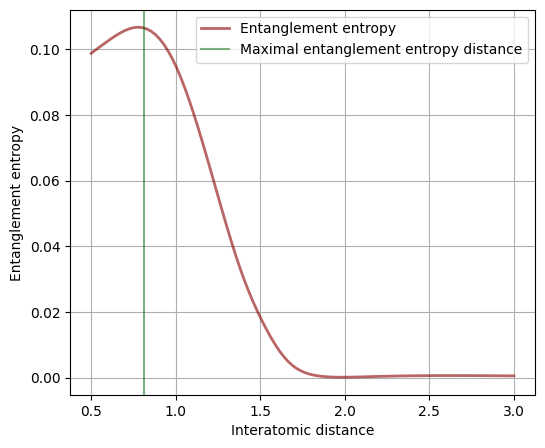

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
#axes.scatter(distances[4:], binding_energies[4:], s=10)
#axes.scatter(
#    distances[startingDistance[7]::1], 
#    entropy_array[7][startingDistance[7]::1],
#    s=20, 
#    c='darkblue', 
#    marker='*',
#    alpha=0.3
#)
line0, = axes.plot(
    np.linspace(0.5, 3.0, 100), 
    [entropy_fit(r) for r in np.linspace(0.5, 3.0, 100)], 
    c='darkred',
    alpha=0.6,
    label='Entanglement entropy',
    linewidth=2
)

axes.set_xlabel('Interatomic distance')
axes.set_ylabel('Entanglement entropy')
axes.grid(True)
line1 = axes.axvline(x=0.81, label='Maximal entanglement entropy distance', c='darkgreen', alpha=0.5)
axes.legend(handles=[line0, line1])
plt.savefig(os.path.join(save_dir, 'entanglement_entropy'), dpi=300, transparent=False, bbox_inches='tight')
plt.show()

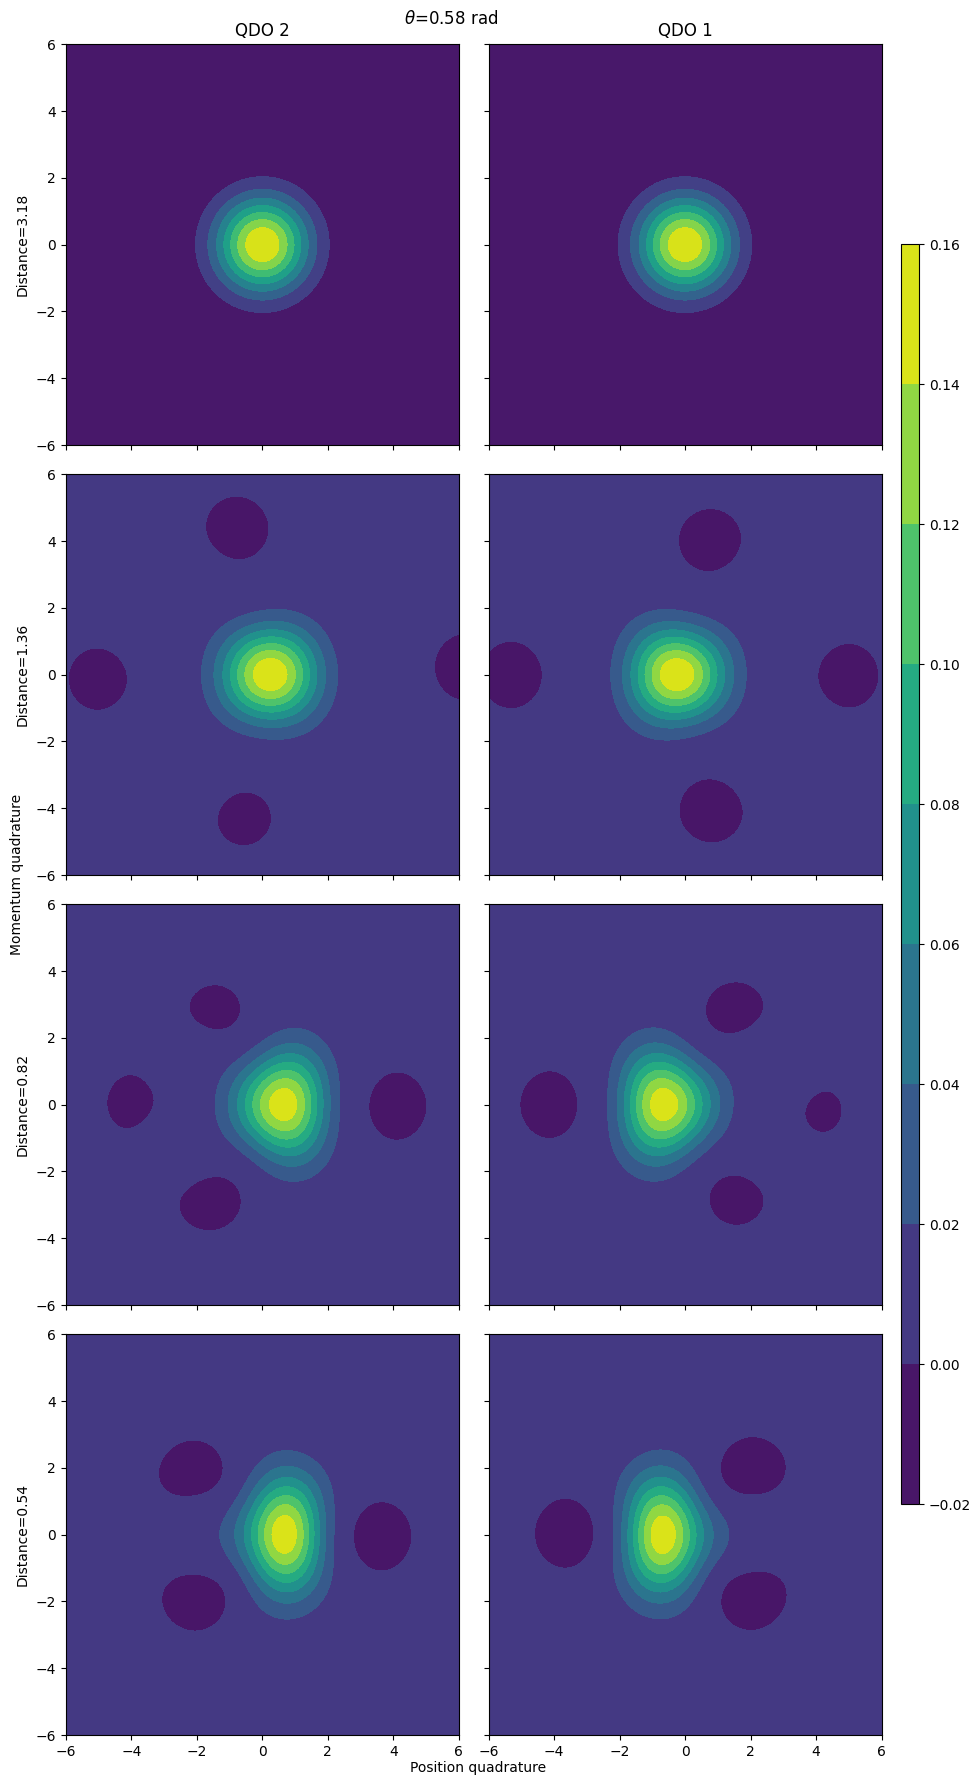

In [62]:
X, P = np.meshgrid(quadrature_grid, quadrature_grid)

state0 = FockStateTF(state_data=states[7, 180], num_modes=2, pure=True, cutoff_dim=args['cutoff_dim'])
state1 = FockStateTF(state_data=states[7, 72], num_modes=2, pure=True, cutoff_dim=args['cutoff_dim'])
state2 = FockStateTF(state_data=states[7, 42], num_modes=2, pure=True, cutoff_dim=args['cutoff_dim'])
state3 = FockStateTF(state_data=states[7, 26], num_modes=2, pure=True, cutoff_dim=args['cutoff_dim'])

w_qdo1_0 = state0.wigner(mode=0, xvec=quadrature_grid, pvec=quadrature_grid)
w_qdo2_0 = state0.wigner(mode=1, xvec=quadrature_grid, pvec=quadrature_grid)
w_qdo1_1 = state1.wigner(mode=0, xvec=quadrature_grid, pvec=quadrature_grid)
w_qdo2_1 = state1.wigner(mode=1, xvec=quadrature_grid, pvec=quadrature_grid)
w_qdo1_2 = state2.wigner(mode=0, xvec=quadrature_grid, pvec=quadrature_grid)
w_qdo2_2 = state2.wigner(mode=1, xvec=quadrature_grid, pvec=quadrature_grid)
w_qdo1_3 = state3.wigner(mode=0, xvec=quadrature_grid, pvec=quadrature_grid)
w_qdo2_3 = state3.wigner(mode=1, xvec=quadrature_grid, pvec=quadrature_grid)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(9, 18), sharex=True, sharey=True)

heatmap1_0 = axes[0, 0].contourf(X, P, w_qdo2_0)
axes[0, 0].set_title("QDO 2")
heatmap2_0 = axes[0, 1].contourf(X, P, w_qdo1_0)
axes[0, 1].set_title("QDO 1")
axes[0, 0].set_ylabel("Distance=3.18")

heatmap1_1 = axes[1, 0].contourf(X, P, w_qdo2_1)
heatmap2_1 = axes[1, 1].contourf(X, P, w_qdo1_1)
axes[1, 0].set_ylabel("Distance=1.36")

heatmap1_2 = axes[2, 0].contourf(X, P, w_qdo2_2)
heatmap2_2 = axes[2, 1].contourf(X, P, w_qdo1_2)
axes[2, 0].set_ylabel("Distance=0.82")

heatmap1_3 = axes[3, 0].contourf(X, P, w_qdo2_3)
heatmap2_3 = axes[3, 1].contourf(X, P, w_qdo1_3)
axes[3, 0].set_ylabel("Distance=0.54")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.0, 0.15, 0.02, 0.7])
fig.colorbar(heatmap2_3, cax=cbar_ax)
fig.text(0.53, 0.001, 'Position quadrature', ha='center')
fig.text(0.01, 0.5, 'Momentum quadrature', va='center', rotation='vertical')
plt.suptitle(r"$\theta$=0.58 rad")
fig.tight_layout()
plt.savefig(os.path.join(save_dir, 'wigner_movie'), dpi=300, transparent=False, bbox_inches='tight')
plt.show()

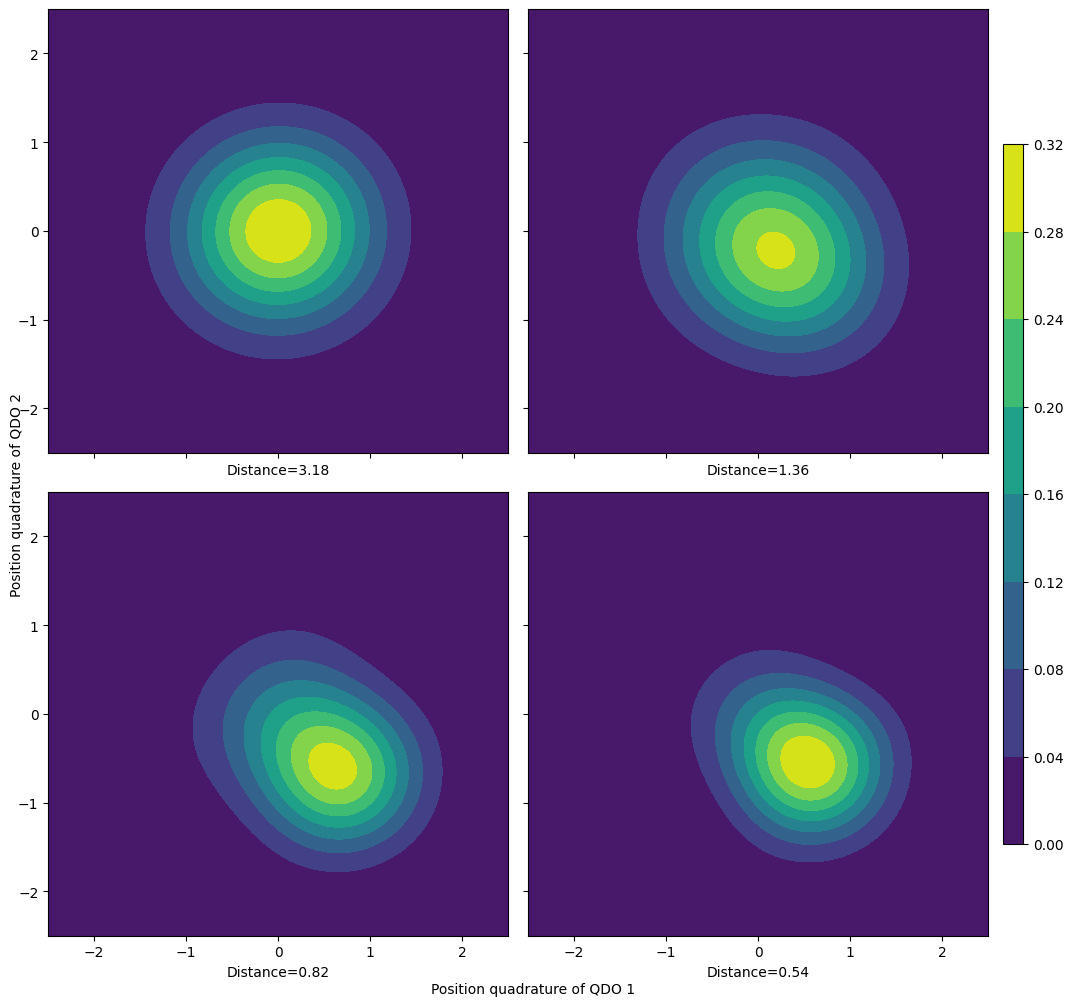

In [63]:
joint_density0 = quadratures_density(
    x=quadrature_grid,
    alpha=states[7, 180],
    num_modes=2,
    cutoff=args['cutoff_dim']
)
joint_density1 = quadratures_density(
    x=quadrature_grid,
    alpha=states[7, 72],
    num_modes=2,
    cutoff=args['cutoff_dim']
)
joint_density2 = quadratures_density(
    x=quadrature_grid,
    alpha=states[7, 42],
    num_modes=2,
    cutoff=args['cutoff_dim']
)
joint_density3 = quadratures_density(
    x=quadrature_grid,
    alpha=states[7, 26],
    num_modes=2,
    cutoff=args['cutoff_dim']
)

X1, X2 = np.meshgrid(quadrature_grid, quadrature_grid)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
heatmap0 = axes[0, 0].contourf(X1, X2, joint_density0)
heatmap1 = axes[0, 1].contourf(X1, X2, joint_density1)
heatmap2 = axes[1, 0].contourf(X1, X2, joint_density2)
heatmap3 = axes[1, 1].contourf(X1, X2, joint_density3)

lim = 2.5
axes[0, 0].set_xlim(-lim, lim)
axes[0, 0].set_ylim(-lim, lim)
axes[0, 1].set_xlim(-lim, lim)
axes[0, 1].set_ylim(-lim, lim)
axes[1, 0].set_xlim(-lim, lim)
axes[1, 0].set_ylim(-lim, lim)
axes[1, 1].set_xlim(-lim, lim)
axes[1, 1].set_ylim(-lim, lim)
axes[0, 0].set_xlabel("Distance=3.18")
axes[0, 1].set_xlabel("Distance=1.36")
axes[1, 0].set_xlabel("Distance=0.82")
axes[1, 1].set_xlabel("Distance=0.54")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.0, 0.15, 0.02, 0.7])
fig.colorbar(heatmap1, cax=cbar_ax)
fig.text(0.53, 0.001, 'Position quadrature of QDO 1', ha='center')
fig.text(0.007, 0.5, 'Position quadrature of QDO 2', va='center', rotation='vertical')

fig.tight_layout()
plt.savefig(os.path.join(save_dir, 'position_quadratures_movie'), dpi=300, transparent=False, bbox_inches='tight')
plt.show()

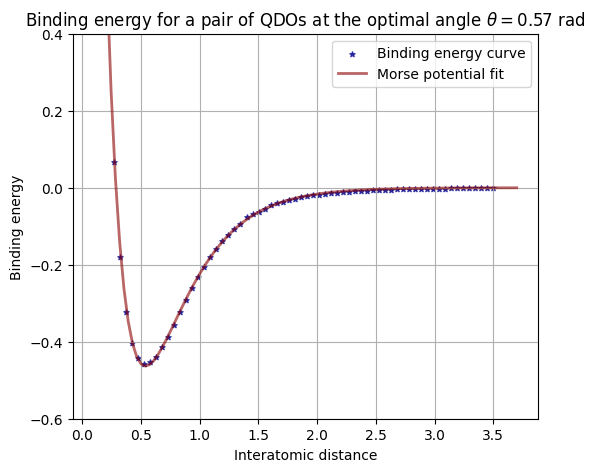

In [64]:
angle_idx = 7

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

line1, = axes.plot(
    np.linspace(0.1, 3.7, 100), 
    [interpolation_morse(r, angle_idx) for r in np.linspace(0.1, 3.7, 100)], 
    c='darkred',
    alpha=0.6,
    linewidth=2.0,
    label='Morse potential fit'
)
line0 = axes.scatter(
    distances[startingDistance[angle_idx-1]::3], 
    binding_energies[angle_idx, startingDistance[angle_idx-1]::3], 
    s=15, 
    c='darkblue', 
    marker='*',
    alpha=0.7,
    label='Binding energy curve'
)
    
axes.set_xlabel('Interatomic distance')
axes.set_ylabel('Binding energy')
axes.set_ylim(-0.6, 0.4)
axes.grid(True)
axes.set_title(r'Binding energy for a pair of QDOs at the optimal angle $\theta=0.57$ rad')
axes.legend(handles=[line0, line1])
plt.savefig(os.path.join(save_dir, 'morse_fit'), dpi=300, transparent=False, bbox_inches='tight')
plt.show()

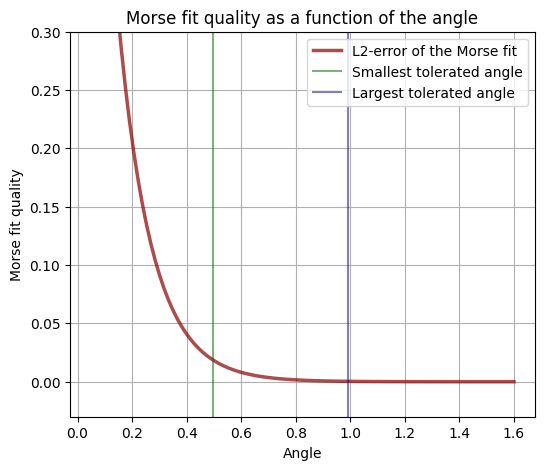

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

line0, = axes.plot(
    np.linspace(0.05, 1.6, 100), 
    [fit_morse_quality(r) for r in np.linspace(0.01, 1.6, 100)], 
    c='darkred',
    alpha=0.7,
    label='L2-error of the Morse fit',
    linewidth=2.5
)

line1 = axes.axvline(x=0.4960409453036515, label='Smallest tolerated angle', c='darkgreen', alpha=0.5)
line2 = axes.axvline(x=0.992081890607303, label='Largest tolerated angle', c='darkblue', alpha=0.5)

axes.legend(handles=[line0, line1, line2])

axes.set_xlabel('Angle')
axes.set_ylabel('Morse fit quality')
axes.set_ylim(-0.03, 0.3)
axes.grid(True)
axes.set_title('Morse fit quality as a function of the angle')
plt.show()

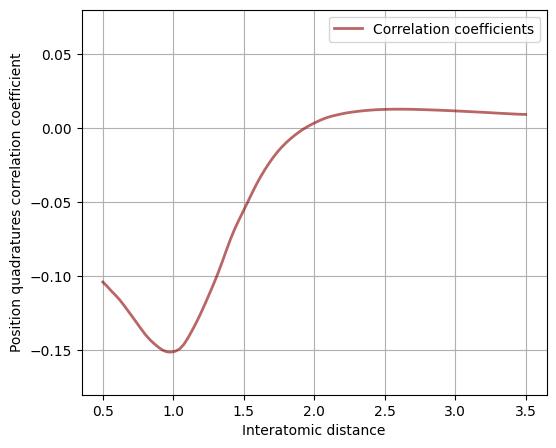

In [66]:
def correlation_fit(r):
    def k(x, y, sigma):
        return exp(-(x - y)**2 / (2 * sigma**2))
    
    sigma = 0.04
    up = 0
    down = 0

    start = startingDistance[7]

    for i in range(distances[start:].shape[0]):
        up += k(r, distances[start:][i], sigma) * correlation_array[7][start:][i]
        down += k(r, distances[start:][i], sigma)
 
    return up / down

angle_idx = 7

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

#line0 = axes.scatter(
#    distances[startingDistance[angle_idx-1]+5::3], 
#    correlation_array[angle_idx, startingDistance[angle_idx-1]+5::3], 
#    s=15, 
#    c='darkblue', 
#    marker='*',
#    alpha=0.7,
#    label='Position quadratures correlation coefficient'
#)

line1, = axes.plot(
    np.linspace(0.5, 3.5, 100), 
    [correlation_fit(r) for r in np.linspace(0.5, 3.5, 100)], 
    c='darkred',
    alpha=0.6,
    label='Correlation coefficients',
    linewidth=2
)
    
axes.set_xlabel('Interatomic distance')
axes.set_ylabel('Position quadratures correlation coefficient')
axes.set_ylim(-0.18, 0.08)
axes.grid(True)
#axes.legend(handles=[line0, line1])
axes.legend(handles=[line1])
plt.savefig(os.path.join(save_dir, 'correlation_fit'), dpi=300, transparent=False, bbox_inches='tight')
plt.show()